In [67]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
df = pd.read_csv("E:\Technology\python\Datasets\movies.csv")
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

### EDA

In [26]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [27]:
# There are Null values but we aren't removing/clearning them because we aren't training the model.
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [28]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

[Text(0, 0, 'Pirates of the Caribbean: On Stranger Tides'),
 Text(1, 0, "Pirates of the Caribbean: At World's End"),
 Text(2, 0, 'Avengers: Age of Ultron'),
 Text(3, 0, 'Superman Returns'),
 Text(4, 0, 'John Carter'),
 Text(5, 0, 'Tangled'),
 Text(6, 0, 'Spider-Man 3'),
 Text(7, 0, 'The Lone Ranger'),
 Text(8, 0, 'X-Men: Days of Future Past'),
 Text(9, 0, 'The Hobbit: The Desolation of Smaug')]

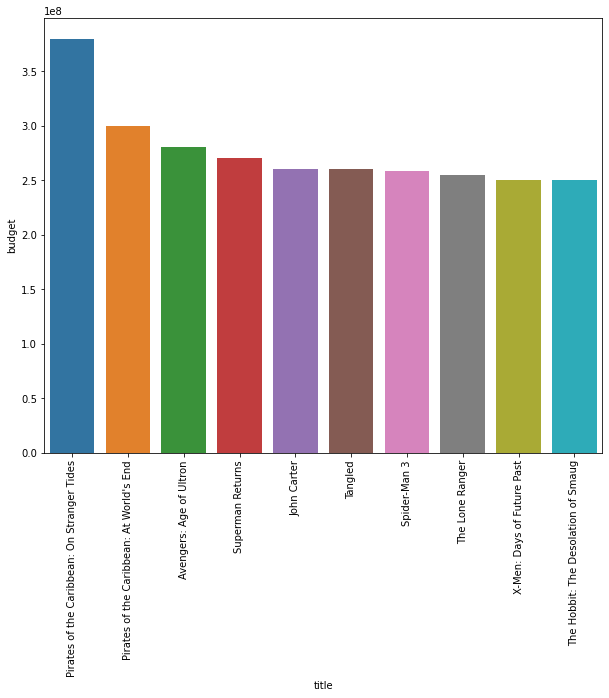

In [87]:
# Top 10 movies with biggest budget

fig, ax = plt.subplots(figsize=(10, 8))

df_budget = df.sort_values(by='budget',ascending=False)[['title','budget']][:10]
sns.barplot(x=df_budget.title,y=df_budget.budget)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.bar(df_budget.title,df_budget.budget)
#plt.show()


In [132]:
# Checking the most common genres -> People love Drama !! (TOP 3,Drama, Comedy and Romance)
df.groupby('genres').size().sort_values(ascending=False)[:10]

df.genres.value_counts()[0:10]

Drama                   370
Comedy                  282
Drama Romance           164
Comedy Romance          144
Comedy Drama            142
Comedy Drama Romance    109
Horror Thriller          88
Documentary              68
Horror                   64
Drama Thriller           62
Name: genres, dtype: int64

In [25]:
# English Movies are being watched the most.
df.original_language.value_counts().sort_values(ascending=False)[:10]

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
Name: original_language, dtype: int64

[Text(0, 0, 'Minions'),
 Text(1, 0, 'Interstellar'),
 Text(2, 0, 'Deadpool'),
 Text(3, 0, 'Guardians of the Galaxy'),
 Text(4, 0, 'Mad Max: Fury Road'),
 Text(5, 0, 'Jurassic World'),
 Text(6, 0, 'Pirates of the Caribbean: The Curse of the Black Pearl'),
 Text(7, 0, 'Dawn of the Planet of the Apes'),
 Text(8, 0, 'The Hunger Games: Mockingjay - Part 1'),
 Text(9, 0, 'Big Hero 6')]

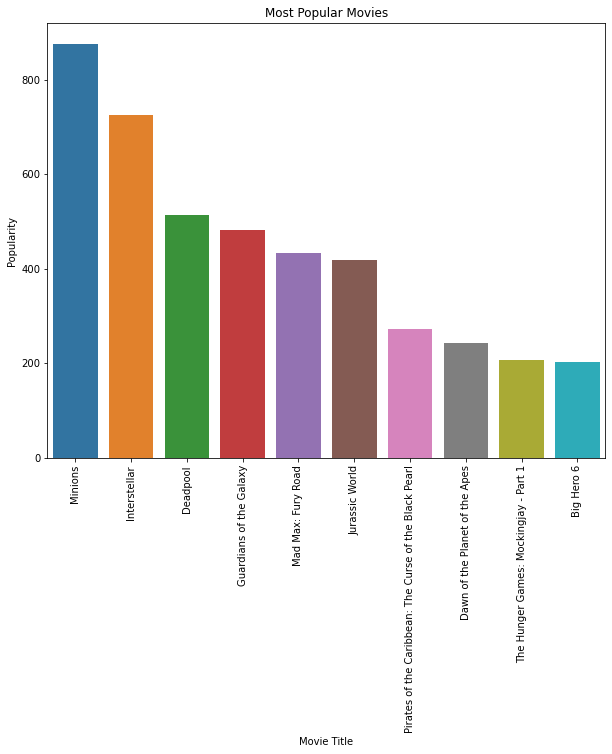

In [144]:
# Top 10 movies based on Popularity.

df_pop = df.sort_values(by='popularity',ascending=False)[['title','popularity']][:10]

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=df_pop.title,y=df_pop.popularity)

plt.xlabel('Movie Title')
plt.ylabel('Popularity')

plt.title('Most Popular Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [50]:
# Top 10 production companies creating the Movies

df.production_companies.value_counts(ascending=False)[:10]

[]                                                                 351
[{"name": "Paramount Pictures", "id": 4}]                           58
[{"name": "Universal Pictures", "id": 33}]                          45
[{"name": "New Line Cinema", "id": 12}]                             38
[{"name": "Columbia Pictures", "id": 5}]                            37
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]                 32
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}]     31
[{"name": "Warner Bros.", "id": 6194}]                              27
[{"name": "Walt Disney Pictures", "id": 2}]                         27
[{"name": "Touchstone Pictures", "id": 9195}]                       26
Name: production_companies, dtype: int64

Text(0.5, 1.0, 'Movies with highest Revenues')

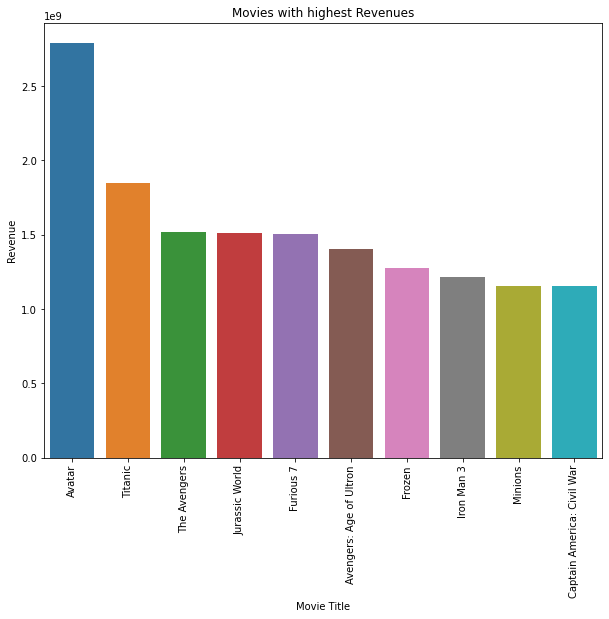

In [140]:
# Top 10 movies with highest revenues

df_revenue = df.sort_values(by='revenue',ascending=False)[['title','revenue']][:10]


# Top 10 movies with biggest budget

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=df_revenue.title,y=df_revenue.revenue)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel('Movie Title')
plt.ylabel('Revenue')

plt.title('Movies with highest Revenues')

In [94]:
# Movies with highest vote count and vote average

df.sort_values(by=['vote_count','vote_average'],ascending=False)[['title','vote_count','vote_average']][:10]

,title,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
788,Deadpool,10995,7.4
95,Interstellar,10867,8.1
287,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
426,The Hunger Games,9455,6.9
127,Mad Max: Fury Road,9427,7.2


### Feature Engineering

In [6]:
features = ['genres','keywords','tagline','cast','director']
features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [4]:
# Replacing empty values in feature with ""

for feature in features:
    df[feature] = df[feature].fillna('')

df.isna().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [5]:
combined_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']
combined_features[0]

'Action Adventure Fantasy Science Fiction culture clash future space war space colony society Enter the World of Pandora. Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [6]:
# Converting text data to feature vectors

vectorizer = TfidfVectorizer()

In [7]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [8]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [9]:
# printing document_id of vectors
vectorizer.get_feature_names_out()[0:10]

array(['000', '007', '05', '06', '08', '10', '100', '1000', '1001', '11'],
      dtype=object)

In [12]:
# getting similarity scores using cosine similarity
# basically its a feature vector

similarity = cosine_similarity(feature_vectors)
similarity.shape

(4803, 4803)

In [57]:
# Getting Movie name

movie_name = input("Enter your fav movie :")

Enter your fav movie :Batman


In [39]:
# Creating a list of all the movies

list_of_all_titles = df['title'].tolist()
list_of_all_titles

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [88]:
# finding close match to the movie name

find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)
find_close_match

close_match = find_close_match[0]
close_match

'Batman'

In [89]:
# finding index of the movie with title

index_of_the_movie = df[df.title == close_match]['index'].values[0]
index_of_the_movie

1359

In [70]:
# Getting list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
similarity_score

[(0, 0.02531512269737111),
 (1, 0.04983293064399152),
 (2, 0.013599520029326722),
 (3, 0.20438773732168222),
 (4, 0.024929726723526918),
 (5, 0.11533013884014888),
 (6, 0.0),
 (7, 0.005521938648290493),
 (8, 0.03093493520052642),
 (9, 0.0897616996163815),
 (10, 0.11240850198526249),
 (11, 0.011808001891564552),
 (12, 0.03825857693295372),
 (13, 0.01326374702786566),
 (14, 0.12815026535769386),
 (15, 0.010432758242497996),
 (16, 0.005235971636780309),
 (17, 0.01601669810036477),
 (18, 0.04153881551585253),
 (19, 0.02968626711977731),
 (20, 0.025210054010122055),
 (21, 0.004591239318101996),
 (22, 0.01792276874908081),
 (23, 0.024870438166594427),
 (24, 0.04186550745628901),
 (25, 0.0),
 (26, 0.005699120907668437),
 (27, 0.013106673998149269),
 (28, 0.014389581335300713),
 (29, 0.005723805699010054),
 (30, 0.11336219425554919),
 (31, 0.02290308453698018),
 (32, 0.0899394677673743),
 (33, 0.005487629188043741),
 (34, 0.0),
 (35, 0.025792416651174273),
 (36, 0.04323488875573723),
 (37, 0.0

In [71]:
# sorting movies based on similarity score

sorted_similar_movies = sorted(similarity_score,key = lambda x:x[1], reverse=True)
sorted_similar_movies

[(1359, 1.0),
 (428, 0.4311643836232694),
 (210, 0.25737999820859625),
 (3, 0.20438773732168222),
 (119, 0.19262528757150407),
 (65, 0.1775581506611392),
 (1512, 0.14705162654306442),
 (813, 0.14414128303962467),
 (2530, 0.13737322473729185),
 (1017, 0.13713281929528845),
 (473, 0.13217075714794208),
 (753, 0.13216136203404205),
 (278, 0.12996260715124025),
 (14, 0.12815026535769386),
 (72, 0.12266571244563478),
 (2313, 0.1183433298876972),
 (2381, 0.11752380293327759),
 (5, 0.11533013884014888),
 (2858, 0.11413652180839844),
 (4183, 0.11353876531321921),
 (30, 0.11336219425554919),
 (2655, 0.11270953916613297),
 (10, 0.11240850198526249),
 (1035, 0.11197582745207195),
 (2685, 0.10980421440315517),
 (870, 0.10722005407914785),
 (41, 0.10650154604688718),
 (1296, 0.10584478077207024),
 (438, 0.10277392559139559),
 (1477, 0.10199709558322863),
 (299, 0.10154632458465614),
 (1474, 0.10078843818576026),
 (1002, 0.1005262424012352),
 (1085, 0.10023066759543668),
 (2753, 0.09951168410001496)

In [72]:
# printing the name of similar movies based on index

print("Movie suggestions for you :")

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    
    title_from_index = df[df.index == index]['title'].values[0]
    if (i<30):
        print(i, '-',title_from_index)
        i=i+1


Movie suggestions for you :
1 - Batman
2 - Batman Returns
3 - Batman & Robin
4 - The Dark Knight Rises
5 - Batman Begins
6 - The Dark Knight
7 - A History of Violence
8 - Superman
9 - Beetlejuice
10 - Bedazzled
11 - Mars Attacks!
12 - The Sentinel
13 - Planet of the Apes
14 - Man of Steel
15 - Suicide Squad
16 - The Mask
17 - Salton Sea
18 - Spider-Man 3
19 - The Postman Always Rings Twice
20 - Hang 'em High
21 - Spider-Man 2
22 - Dungeons & Dragons: Wrath of the Dragon God
23 - Superman Returns
24 - Jonah Hex
25 - Exorcist II: The Heretic
26 - Superman II
27 - Green Lantern
28 - Superman III
29 - Something's Gotta Give
